>> ## Quantitative analysis for META

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')


>>> #### Load data

In [2]:
data = pd.read_csv("./data/yfinance_data/META_historical_data.csv")

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0
5,2012-12-19,27.830000,28.219999,26.950001,27.410000,27.353790,61390300,0.0,0.0
6,2012-12-20,27.490000,27.600000,27.129999,27.360001,27.303892,35574800,0.0,0.0
7,2012-12-21,26.660000,27.010000,26.120001,26.260000,26.206148,54555200,0.0,0.0
8,2012-12-24,26.500000,26.959999,26.200001,26.930000,26.874775,28230100,0.0,0.0
9,2012-12-26,27.030001,27.180000,26.379999,26.510000,26.455635,33175400,0.0,0.0


>>> ##### Ensure your data includes columns like Open, High, Low, Close, and Volume.

In [4]:
from scripts.edaAndQuantitativeAnalysis import validate_columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
validate_columns(data, required_columns)  

All required columns are present.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2926 non-null   object 
 1   Open          2926 non-null   float64
 2   High          2926 non-null   float64
 3   Low           2926 non-null   float64
 4   Close         2926 non-null   float64
 5   Adj Close     2926 non-null   float64
 6   Volume        2926 non-null   int64  
 7   Dividends     2926 non-null   float64
 8   Stock Splits  2926 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.9+ KB


>>> #####  Handle missing values

In [6]:
from scripts.edaAndQuantitativeAnalysis import handle_missing_values

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0


>>> ##### Analyze statistics

In [7]:
from scripts.edaAndQuantitativeAnalysis import analyze_statistics
  
analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

              Open         High          Low    Adj Close        Close  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean    179.557215   181.875331   177.317761   179.305921   179.649453   
std     108.864895   110.256219   107.511134   108.755055   108.906971   
min      22.990000    23.090000    22.670000    22.853037    22.900000   
25%      97.767502    98.772499    95.889997    97.182795    97.382498   
50%     166.870003   168.850006   164.210007   166.512825   166.855003   
75%     231.450005   234.934998   228.687504   231.948360   232.424999   
max     542.349976   542.809998   528.359985   539.909973   539.909973   

             Volume  
count  2.926000e+03  
mean   2.872083e+07  
std    2.269811e+07  
min    5.467500e+06  
25%    1.571308e+07  
50%    2.176100e+07  
75%    3.294468e+07  
max    3.654579e+08  


>>> ##### visualize distribution 

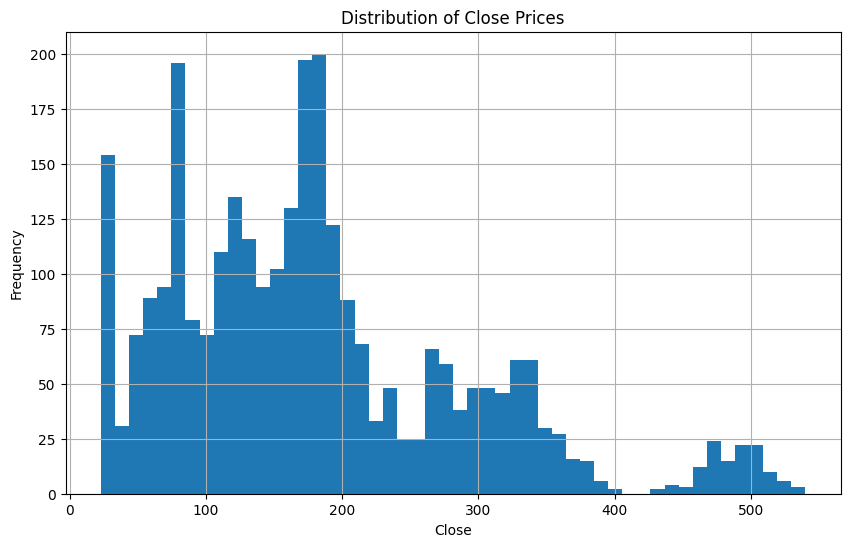

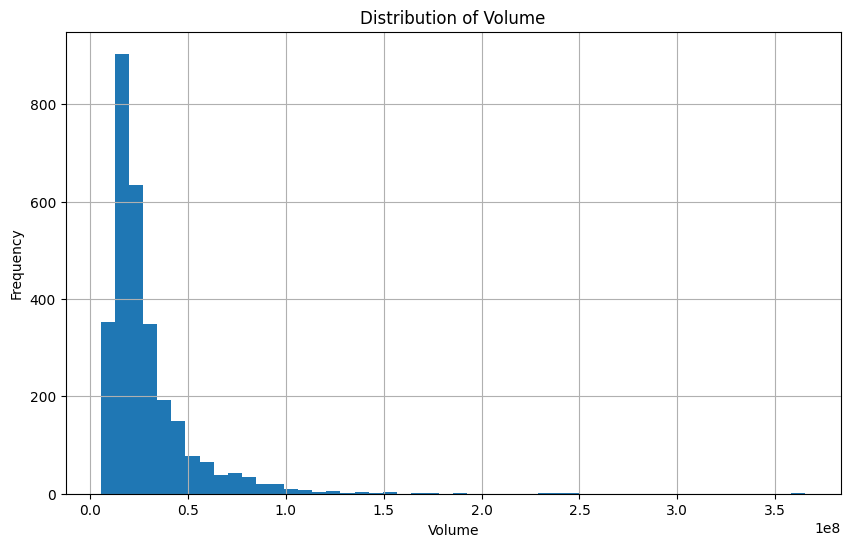

In [8]:
from scripts.edaAndQuantitativeAnalysis import plot_distributions
plot_distributions(data, 'Close', title="Distribution of Close Prices")
plot_distributions(data, 'Volume', title="Distribution of Volume")

>>> ##### Analyze correlation


Correlation Matrix:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999774  0.999747   0.999492  0.999491 -0.391211
High       0.999774  1.000000  0.999713   0.999768  0.999768 -0.387068
Low        0.999747  0.999713  1.000000   0.999778  0.999779 -0.395943
Adj Close  0.999492  0.999768  0.999778   1.000000  0.999999 -0.391539
Close      0.999491  0.999768  0.999779   0.999999  1.000000 -0.391652
Volume    -0.391211 -0.387068 -0.395943  -0.391539 -0.391652  1.000000


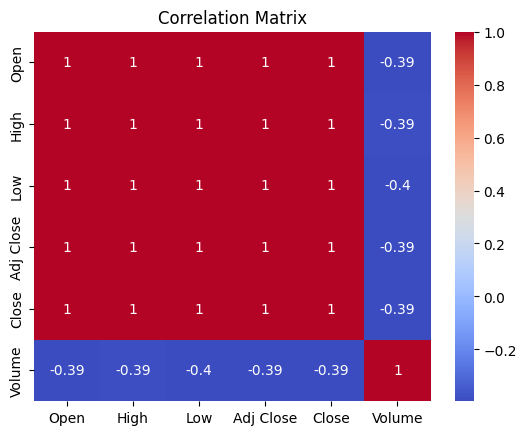

In [9]:
from scripts.edaAndQuantitativeAnalysis import analyze_correlations
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

>>> ##### study volatility

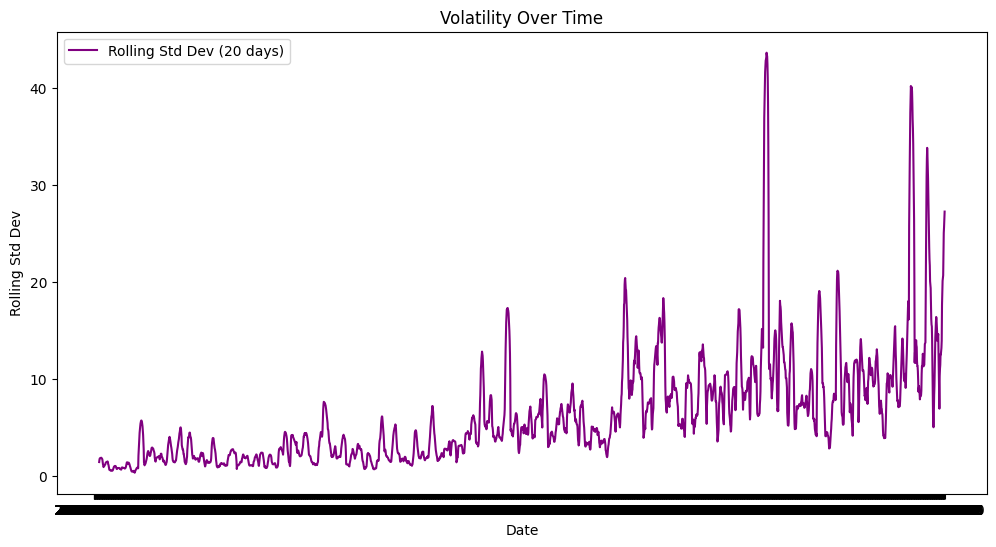

In [10]:
from scripts.edaAndQuantitativeAnalysis import plot_volatility
plot_volatility(data, 'Close', 'Date')